## Stock-Price-Trend-Prediction-Based-on-News-DSI
--- 
The prediction of stock prices in the market has always been an important task. However, due to the market volatility, it is difficult to make the correct prediction solely based on historical stock data. With the analysis of daily news’ impact on stock markets, some key features have been idfentified that could be useful in stock price prediction and a deep learning model has been implemented to capture the fluctuations in thr stock prices.

For this project 2 datasets have been used. The first dataset has the date and the top 25 headlines for each day from the year 2008 to the year 2016. The second dataset has the date column along with the values of open, high, low, close, volume and adjusted close prices. Both these data sets have been merged on the date column after carrying out data-preprocessing. There are 1989 data points in the combined dataset.The sentimental analysis was perfomed inorder to identify the sentiments of the news headlines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import sklearn
import seaborn as sns
sns.set()
import io
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:

# Reading the data
DJIA_table_data = pd.read_csv('upload_DJIA_table.csv')

# Printing out the first 5 rows of the dataframe
DJIA_table_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023


### 1). DJIA Data Cleaning and Preprocessing

In [3]:
#Information about the coumns
DJIA_table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


* No-null values are present
* Date column should be in datetime format.

In [4]:
#converting 'Date' column type to Datetime
DJIA_table_data['Date'] = DJIA_table_data['Date']. astype('datetime64[ns]')
DJIA_table_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969
1985,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
1986,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
1987,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961


In [5]:
#getting a summary of the data
DJIA_table_data.describe(include='all')

<ipython-input-5-91ed1b959f2c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  DJIA_table_data.describe(include='all')


,Date,Open,High,Low,Close,Volume,Adj Close
count,1989,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
unique,1989,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,NaN,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,NaN,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,NaN,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,10913.379880


* The scale for the values in Volume column is very different as compared to other columns, so we will have to scale the 'Volume' column
* Min value for all columns except Volume is in between 6400-6700
* Max value for all columns except Volume is in between 18200-18350

---
#### Checking distributions

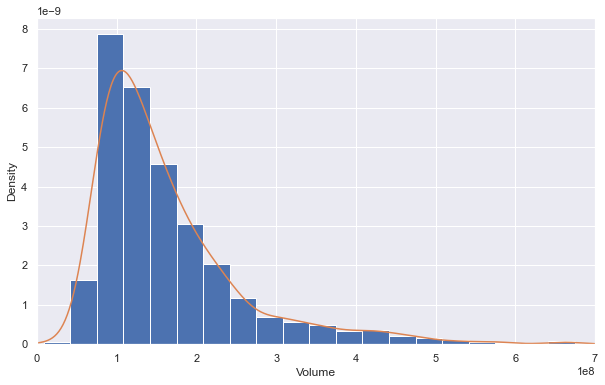

In [6]:
#Plotting the distribution for Volume column
plt.figure(figsize=((10,6)))
ax=DJIA_table_data['Volume'].hist(bins=20, density=True)
DJIA_table_data['Volume'].plot(kind='density')
ax.set(xlabel='Volume')
plt.xlim(0,700000000)
plt.show()

In [7]:
#checking skewness
DJIA_table_data.skew(axis=0)

Open        -0.072689
High        -0.063396
Low         -0.083832
Close       -0.074162
Volume       1.957286
Adj Close   -0.074162
dtype: float64

* Volume is highly and positively skewed
* All the other columns seem fine as their skewness is not below -1 and not above +1.

To deal with the skewness we are performing square root transformation on the volume column.

#### Sqrt Transformation

In [8]:
#Square root tranformation
DJIA_table_data['Sqrt_Volume']=np.sqrt(DJIA_table_data['Volume'])

#checking skewness
print(DJIA_table_data.skew(axis=0))

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
dtype: float64


In [9]:
DJIA_table_data.agg([min,max])

,Date,Open,High,Low,Close,Volume,Adj Close,Sqrt_Volume
min,2008-08-08,6547.009766,6709.609863,6469.950195,6547.049805,8410000,6547.049805,2900.000000
max,2016-07-01,18315.060550,18351.359380,18272.560550,18312.390630,674920000,18312.390630,25979.222467


* By applying square root transformation Volume column becomes comparable to other columns but the data is still skewed.

<AxesSubplot:xlabel='Sqrt_Volume'>

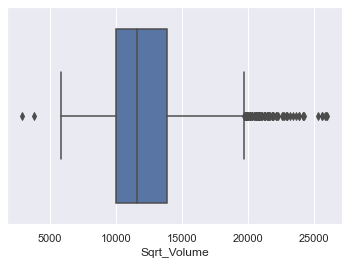

In [10]:
#Checking the outliers in transformed data
sns.boxplot(x=DJIA_table_data['Sqrt_Volume'])

In [11]:
#function to find outiers' index
def outlier_indices(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
    IQR = Q3 - Q1 #Interquartile range

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outlier_index =[]
    i=-1
    for x in data:
        i=i+1
        if ((x> up_lim) or (x<low_lim)):
             outlier_index.append(i)
    print("number of outliers in the data:",len(outlier_index))
    return(outlier_index)

In [12]:
#Total Outliers and percentage in Sqrt_Volume
a=outlier_indices(DJIA_table_data['Sqrt_Volume'])
#Total Outliers percentage in Sqrt_Volume
print("percentage is: ",len(a)/DJIA_table_data.shape[0]* 100)

number of outliers in the data: 86
percentage is:  4.323780794369029


#### Log Transformation

In [13]:
#Trying log transformation
DJIA_table_data['Log_Volume']=np.log(DJIA_table_data['Volume'])

#checking skewness
print(DJIA_table_data.skew(axis=0))

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
Log_Volume     0.388841
dtype: float64


In [14]:
DJIA_table_data.agg([min,max])

,Date,Open,High,Low,Close,Volume,Adj Close,Sqrt_Volume,Log_Volume
min,2008-08-08,6547.009766,6709.609863,6469.950195,6547.049805,8410000,6547.049805,2900.000000,15.944932
max,2016-07-01,18315.060550,18351.359380,18272.560550,18312.390630,674920000,18312.390630,25979.222467,20.330105


* By applying log transformation Volume data is no more skewed, but the column is not comparable to other columns.
* We will have to scale all the columns

<AxesSubplot:xlabel='Log_Volume'>

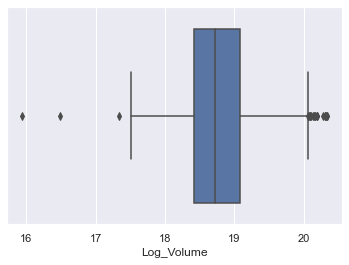

In [15]:
#Checking the outliers
sns.boxplot(x=DJIA_table_data['Log_Volume'])

In [16]:
#Total Outliers and percentage in log_Volume
b=outlier_indices(DJIA_table_data['Log_Volume'])
#Total Outliers percentage in Log_Volume
print("percentage is: ",len(b)/DJIA_table_data.shape[0]* 100)

number of outliers in the data: 21
percentage is:  1.0558069381598794


In [17]:
DJIA_table_data.skew()

Open          -0.072689
High          -0.063396
Low           -0.083832
Close         -0.074162
Volume         1.957286
Adj Close     -0.074162
Sqrt_Volume    1.179795
Log_Volume     0.388841
dtype: float64

##### Comparing Sqrt and Log transformation, log transformation is removing the skewness of the column. So,  the Log transformed column is retained.

In [18]:
#dropping Sqrt_volume
DJIA_table_data.drop(['Sqrt_Volume'],axis=1,inplace=True)
#dropping adj close column because it is same as close column
DJIA_table_data.drop(['Adj Close'],axis=1,inplace=True)

In [19]:
#Data 
DJIA_table_data.head()

,Date,Open,High,Low,Close,Volume,Log_Volume
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,18.224179
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,18.706085
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,18.482528
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,18.535704
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,18.748112


---


---


### 3). News Text Data Cleaning

In [20]:
#Reading news data
df = pd.read_csv("Combined_News_DJIA.csv",parse_dates=True)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [21]:
#checking information about the news data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

All columns are of object type. Changing the type of Date column to Datetime.

In [22]:
#converting 'Date' column type to Datetime
df['Date'] = df['Date']. astype('datetime64[ns]')
df.dtypes

Date     datetime64[ns]
Label             int64
Top1             object
Top2             object
Top3             object
Top4             object
Top5             object
Top6             object
Top7             object
Top8             object
Top9             object
Top10            object
Top11            object
Top12            object
Top13            object
Top14            object
Top15            object
Top16            object
Top17            object
Top18            object
Top19            object
Top20            object
Top21            object
Top22            object
Top23            object
Top24            object
Top25            object
dtype: object

#### Null values imputation

In [23]:
#Checking Null values in the dataset
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

Three columns have 7 total null values. We can fill those values with the mode of the columns as the columns are of object types.

In [24]:
#imputing missing values
#df.fillna(df.mode(), inplace=True)

df['Top25'].fillna(df['Top22'],inplace=True)
df['Top24'].fillna(df['Top22'],inplace=True)
df['Top23'].fillna(df['Top22'],inplace=True)
df.isnull().sum().sum()

0

No more missing values

In [25]:
data=df.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b Georgia downs two Russian warplanes as cou...,b BREAKING Musharraf to be impeached,b Russia Today Columns of troops roll into So...,b Russian tanks are moving towards the capital...,b Afghan children raped with impunity U N ...,b Russian tanks have entered South Ossetia...,b Breaking Georgia invades South Ossetia Rus...,b The enemy combatent trials are nothing but...,b Georgian troops retreat from S Osettain cap...,b Did the U S Prep Georgia for War with Russia,b Rice Gives Green Light for Israel to Attack ...,b Announcing Class Action Lawsuit on Behalf of...,b So Russia and Georgia are at war and the N...,b China tells Bush to stay out of other countr...,b Did World War III start today,b Georgia Invades South Ossetia if Russia ge...,b Al Qaeda Faces Islamist Backlash,b Condoleezza Rice The US would not act to p...,b This is a busy day The European Union has ...,b Georgia will withdraw soldiers from Ir...,b Why the Pentagon Thinks Attacking Iran is a ...,b Caucasus in crisis Georgia invades South Os...,b Indian shoe manufactory And again in a se...,b Visitors Suffering from Mental Illnesses Ban...,b No Help for Mexico s Kidnapping Surge
1,b Why wont America and Nato help us If they w...,b Bush puts foot down on Georgian conflict,b Jewish Georgian minister Thanks to Israeli ...,b Georgian army flees in disarray as Russians ...,b Olympic opening ceremony fireworks faked,b What were the Mossad with fraudulent New Zea...,b Russia angered by Israeli military sale to G...,b An American citizen living in S Ossetia blam...,b Welcome To World War IV Now In High Definit...,b Georgia s move a mistake of monumental prop...,b Russia presses deeper into Georgia U S say...,b Abhinav Bindra wins first ever Individual Ol...,b U S ship heads for Arctic to define territ...,b Drivers in a Jerusalem taxi station threaten...,b The French Team is Stunned by Phelps and the...,b Israel and the US behind the Georgian aggres...,b Do not believe TV neither Russian nor Geor...,b Riots are still going on in Montreal Canada...,b China to overtake US as largest manufacturer,b War in South Ossetia PICS,b Israeli Physicians Group Condemns State Tort...,b Russia has just beaten the United States ov...,b Perhaps the question about the Georgia R...,b Russia is so much better at war,b So this is what it s come to trading sex fo...
2,b Remember that adorable year old who sang a...,b Russia ends Georgia operation,b If we had no sexual harassment we would hav...,b Al Qa eda is losing support in Iraq because ...,b Ceasefire in Georgia Putin Outmaneuvers the...,b Why Microsoft and Intel tried to kill the XO...,b Stratfor The Russo Georgian War and the Bal...,b I m Trying to Get a Sense of This Whole Geor...,b The US military was surprised by the timing ...,b U S Beats War Drum as Iran Dumps the Dollar,b Gorbachev Georgian military attacked the S...,b CNN use footage of Tskhinvali ruins to cover...,b Beginning a war as the Olympics were opening...,b pyramids as large as the Luxor stacked in...,b The Top Party Cities in the World,b U S troops still in Georgia did you know t...,b Why Russias response to Georgia was right,b Gorbachev accuses U S of making a serious ...,b Russia Georgia and NATO Cold War Two,b Remember that adorable year old who led y...,b War in Georgia The Israeli connection,b All signs point to the US encouraging Georgi...,b Christopher King argues that the US and NATO...,b America The New Mexico,b BBC NEWS Asia Pacific Extinction by man...


In [26]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,b rice gives green light for israel to attack ...,b announcing class action lawsuit on behalf of...,b so russia and georgia are at war and the n...,b china tells bush to stay out of other countr...,b did world war iii start today,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,b welcome to world war iv now in high definit...,b georgia s move a mistake of monumental prop...,b russia presses deeper into georgia u s say...,b abhinav bindra wins first ever individual ol...,b u s ship heads for arctic to define territ...,b drivers in a jerusalem taxi station threaten...,b the french team is stunned by phelps and the...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...
2,b remember that adorable year old who sang a...,b russia ends georgia operation,b if we had no sexual harassment we would hav...,b al qa eda is losing support in iraq because ...,b ceasefire in georgia putin outmaneuvers the...,b why microsoft and intel tried to kill the xo...,b stratfor the russo georgian war and the bal...,b i m trying to get a sense of this whole geor...,b the us military was surprised by the timing ...,b u s beats war drum as iran dumps the dollar,b gorbachev georgian military attacked the s...,b cnn use footage of tskhinvali ruins to cover...,b beginning a war as the olympics were opening...,b pyramids as large as the luxor stacked in...,b the top party cities in the world,b u s troops still in georgia did you know t...,b why russias response to georgia was right,b gorbachev accuses u s of making a serious ...,b russia georgia and nato cold war two,b remember that adorable year old who led y...,b war in georgia the israeli connection,b all signs point to the us encouraging georgi...,b christopher king argues that the us and nato...,b america the new mexico,b bbc news asia pacific extinction by man...


#### Removing b

In [27]:
#removing b from all the text
def remove_b(s):
    """removes b at the beginning from text"""
    #print(s)
    if s[0]=="b":
        s = s[1:]
    return s

for i in new_Index:
    data[i]=data[i].apply(remove_b)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,georgia downs two russian warplanes as coun...,breaking musharraf to be impeached,russia today columns of troops roll into sou...,russian tanks are moving towards the capital ...,afghan children raped with impunity u n o...,russian tanks have entered south ossetia ...,breaking georgia invades south ossetia russ...,the enemy combatent trials are nothing but ...,georgian troops retreat from s osettain capi...,did the u s prep georgia for war with russia,rice gives green light for israel to attack i...,announcing class action lawsuit on behalf of ...,so russia and georgia are at war and the ny...,china tells bush to stay out of other countri...,did world war iii start today,georgia invades south ossetia if russia get...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pr...,this is a busy day the european union has a...,georgia will withdraw soldiers from ira...,why the pentagon thinks attacking iran is a b...,caucasus in crisis georgia invades south oss...,indian shoe manufactory and again in a ser...,visitors suffering from mental illnesses bann...,no help for mexico s kidnapping surge
1,why wont america and nato help us if they wo...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli t...,georgian army flees in disarray as russians a...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeal...,russia angered by israeli military sale to ge...,an american citizen living in s ossetia blame...,welcome to world war iv now in high definiti...,georgia s move a mistake of monumental propo...,russia presses deeper into georgia u s says...,abhinav bindra wins first ever individual oly...,u s ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten ...,the french team is stunned by phelps and the ...,israel and the us behind the georgian aggress...,do not believe tv neither russian nor georg...,riots are still going on in montreal canada ...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states ove...,perhaps the question about the georgia ru...,russia is so much better at war,so this is what it s come to trading sex for...
2,remember that adorable year old who sang at...,russia ends georgia operation,if we had no sexual harassment we would have...,al qa eda is losing support in iraq because o...,ceasefire in georgia putin outmaneuvers the ...,why microsoft and intel tried to kill the xo ...,stratfor the russo georgian war and the bala...,i m trying to get a sense of this whole georg...,the us military was surprised by the timing a...,u s beats war drum as iran dumps the dollar,gorbachev georgian military attacked the so...,cnn use footage of tskhinvali ruins to cover ...,beginning a war as the olympics were opening ...,pyramids as large as the luxor stacked int...,the top party cities in the world,u s troops still in georgia did you know th...,why russias response to georgia was right,gorbachev accuses u s of making a serious b...,russia georgia and nato cold war two,remember that adorable year old who led yo...,war in georgia the israeli connection,all signs point to the us encouraging georgia...,christopher king argues that the us and nato ...,america the new mexico,bbc news asia pacific extinction by man ...


In [28]:
#Combining all the news into one column
headlines=[]
for i in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[i,:25]))#.iloc[,2:27] denotes columns from Top1 to Top 25

In [29]:
headlines[0]#combined news

' georgia  downs two russian warplanes  as countries move to brink of war   breaking  musharraf to be impeached    russia today  columns of troops roll into south ossetia  footage from fighting  youtube    russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire   afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing       russian tanks have entered south ossetia whilst georgia shoots down two russian jets    breaking  georgia invades south ossetia  russia warned it would intervene on so s side   the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it    georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video    did the u s  prep georgia for war with russia    rice gives green light for 

In [30]:
df["headlines"] = ""
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,headlines
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",


In [31]:
for i in range(len(headlines)):
    df["headlines"][i] = headlines[i]
df.head()

<ipython-input-31-d7d244d1ae42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["headlines"][i] = headlines[i]


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,headlines
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",georgia downs two russian warplanes as coun...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",why wont america and nato help us if they wo...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",remember that adorable year old who sang a

In [32]:
l_col=['Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13', 
             'Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25']
df.drop(l_col,axis=1, inplace=True)
df.head()

,Date,Label,headlines
0,2008-08-08,0,georgia downs two russian warplanes as coun...
1,2008-08-11,1,why wont america and nato help us if they wo...
2,2008-08-12,0,remember that adorable year old who sang at...
3,2008-08-13,0,u s refuses israel weapons to attack iran ...
4,2008-08-14,1,all the experts admit that we should legalise...


---

### 4). Merging the Datasets on Date column

In [33]:
#adding the combined news column to df and dropping all other text columns
new_data=DJIA_table_data.merge(df)
new_data.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,headlines
0,2016-07-01,17924.24023,18002.38086,17916.91016,17949.36914,82160000,18.224179,1,a year old woman in mexico city finally re...
1,2016-06-30,17712.75977,17930.60938,17711.80078,17929.99023,133030000,18.706085,1,jamaica proposes marijuana dispensers for tour...
2,2016-06-29,17456.01953,17704.50977,17456.01953,17694.67969,106380000,18.482528,1,explosion at airport in istanbul yemeni former...
3,2016-06-28,17190.50977,17409.72070,17190.50977,17409.72070,112190000,18.535704,1,scientists to australia if you want to ...
4,2016-06-27,17355.21094,17355.21094,17063.08008,17140.24023,138740000,18.748112,0,arclays and rbs shares suspended from trading ...


In [34]:
new_data.rename(columns = {'headlines': 'News'}, inplace = True)

---

In [35]:
new_data.sort_values(by=['Date'], inplace=True)#sorting data
new_data.reset_index(drop=True, inplace=True)
data_train=new_data.copy()

In [36]:
data_train.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,georgia downs two russian warplanes as coun...
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,why wont america and nato help us if they wo...
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,remember that adorable year old who sang at...
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,19.022535,0,u s refuses israel weapons to attack iran ...
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,18.889371,1,all the experts admit that we should legalise...


In [37]:
#dropping duplicates
data_train= data_train.drop_duplicates()

### 5). Sentimental Analysis

In [38]:
# Importing TextBlob
from textblob import TextBlob

# Defining a function which returns polarity
def detect_polarity(text):
    """Returns Polarity"""
    return TextBlob(text).sentiment.polarity

# Defining a function which returns subjectivity
def detect_subjectivity(text):
    """Returns Subjectivity"""
    return TextBlob(text).sentiment.subjectivity

#polarity 
data_train['polarity']=data_train.News.apply(detect_polarity)

#subjectivity
data_train['subjectivity']= data_train.News.apply(detect_subjectivity)
data_train.head()

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News,polarity,subjectivity
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,georgia downs two russian warplanes as coun...,-0.048568,0.267549
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,why wont america and nato help us if they wo...,0.109325,0.374806
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,remember that adorable year old who sang at...,-0.035676,0.495171
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,19.022535,0,u s refuses israel weapons to attack iran ...,0.005842,0.364021
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,18.889371,1,all the experts admit that we should legalise...,0.049050,0.390095


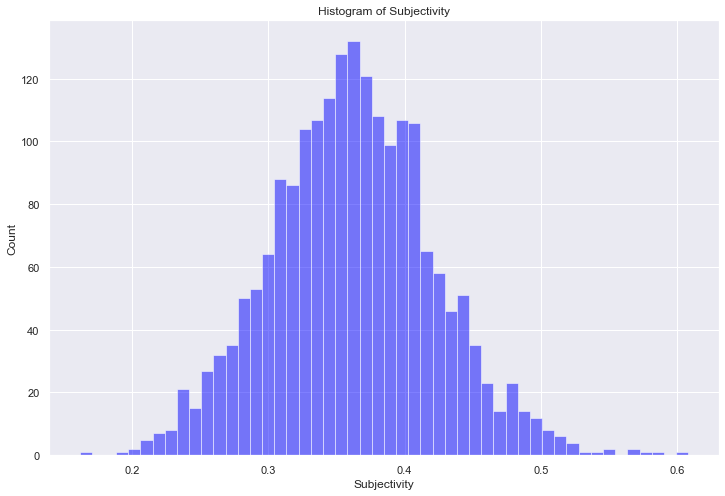

In [39]:
# Distribution of subjectivity
num_bins = 50
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(data_train.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show()

Almost all of the rows have subjectivity < 0.5. There data doesn't have any row with very high subjectivity

In [40]:
max(data_train['subjectivity'])

0.6083333333333333

The maximum subjectivity any row has is 0.608. So, we can consider all the data as fairly subjective.

In [41]:
# counting number of rows with more than 0 polarity
print('No of rows with more than 0 polarity: ',data_train[data_train['polarity']>=0]['polarity'].count())

# counting number of rows with less than 0 polarity
print('No of rows with less than 0 polarity: ',data_train[data_train['polarity']<0]['polarity'].count())

No of rows with more than 0 polarity:  1386
No of rows with less than 0 polarity:  603


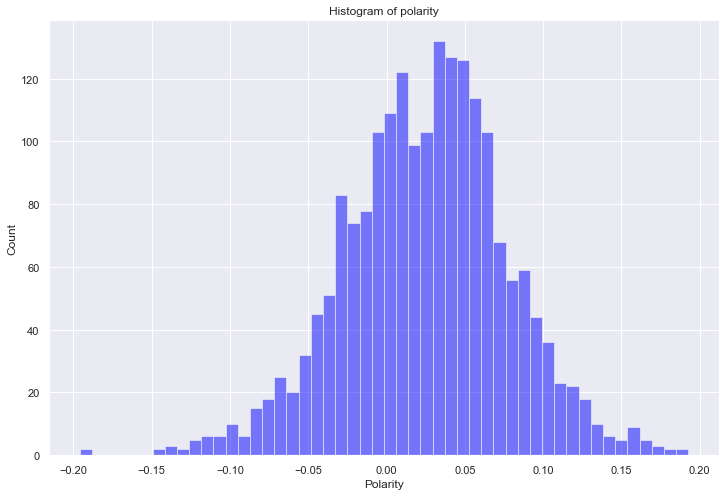

In [42]:
# Distribution of polarity
num_bins = 50
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(data_train.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

Most polarity scores are above zero, meaning most of the news have positive sentiment in the data. 

Comparing this inference with the Labels.

In [43]:
#counting no of rows with label value as 1 and 0
data_train['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

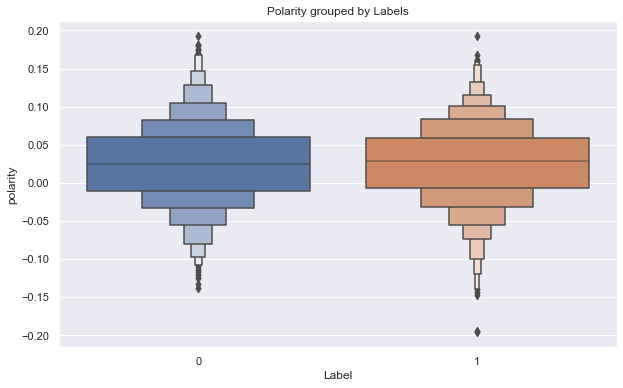

In [44]:
#Polarity grouped by labels
plt.figure(figsize=(10,6))
sns.boxenplot(x='Label', y='polarity', data=data_train)
plt.title('Polarity grouped by Labels')
plt.show()

The price seems to go up more than go down with positive market sentiment.

In [45]:
#News with low polarity
data_train[data_train['polarity']<=0].News.head()

0      georgia  downs two russian warplanes  as coun...
2      remember that adorable   year old who sang at...
7      man arrested and locked up for five hours aft...
11     n korea s kim died in       replaced by looka...
15     russian prime minister vladimir putin has acc...
Name: News, dtype: object

In [46]:
#News with Label value 0
data_train[data_train['Label']==0].News.head()

0     georgia  downs two russian warplanes  as coun...
2     remember that adorable   year old who sang at...
3      u s  refuses israel weapons to attack iran  ...
6     in an afghan prison  the majority of female p...
7     man arrested and locked up for five hours aft...
Name: News, dtype: object

In [47]:
#news with lowest polarity and label value 1
data_train[(data_train['Label']==1) & (data_train['polarity']<=0)].News.head()

20     a french judge has ordered two branches of sc...
26     pakistani tribesmen representing half a milli...
33     russian woman caught red handed drinking oran...
53     argentina nationalizes private pensions and a...
56     finnish e voting system loses    of votes  ha...
Name: News, dtype: object

#### Vader Sentimental Analysis

In [48]:
pip install vaderSentiment

# importing SentimentIntensityAnalyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [49]:
analyzer = SentimentIntensityAnalyzer()
data_train['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data_train['News']]
data_train['neutral'] = [analyzer.polarity_scores(x)['neu'] for x in data_train['News']]
data_train['positive'] = [analyzer.polarity_scores(x)['pos'] for x in data_train['News']]
data_train['negative'] = [analyzer.polarity_scores(x)['neg'] for x in data_train['News']]

In [50]:
data_train.head(3)

,Date,Open,High,Low,Close,Volume,Log_Volume,Label,News,polarity,subjectivity,compound,neutral,positive,negative
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,19.176004,0,georgia downs two russian warplanes as coun...,-0.048568,0.267549,-0.9982,0.727,0.041,0.233
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,19.026034,1,why wont america and nato help us if they wo...,0.109325,0.374806,-0.9838,0.727,0.088,0.185
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,18.972207,0,remember that adorable year old who sang at...,-0.035676,0.495171,-0.9679,0.821,0.055,0.124


In [51]:
#adding sentiment column
def sentiment(data):
    if data<0:
        return('Negative')
    if data>0:
        return('Positive')
    if data==0:
        return('Neutral')

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


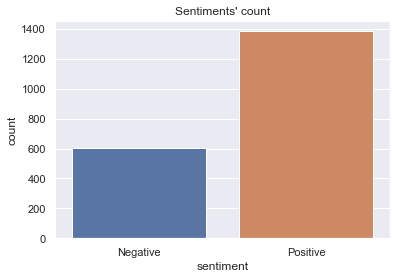

In [52]:
#sentiment based on polarity
data_train['sentiment']=data_train.polarity.apply(sentiment)
sns.countplot(data_train.sentiment)
plt.title('Sentiments\' count')
plt.show()

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sentiment Analysis Scatter Plot')

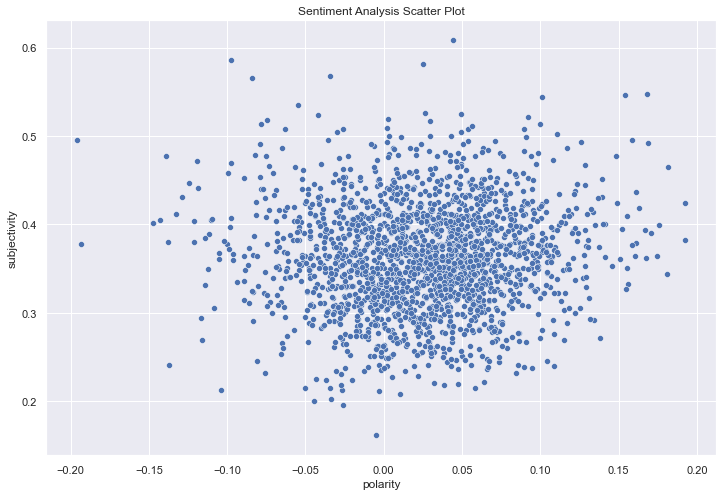

In [53]:
#plotting polarity and subjectivity scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(data_train['polarity'], data_train['subjectivity'])
plt.title('Sentiment Analysis Scatter Plot')

Most datapoints seem to have values around neutral polarity and subjectivity.

### 6). Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


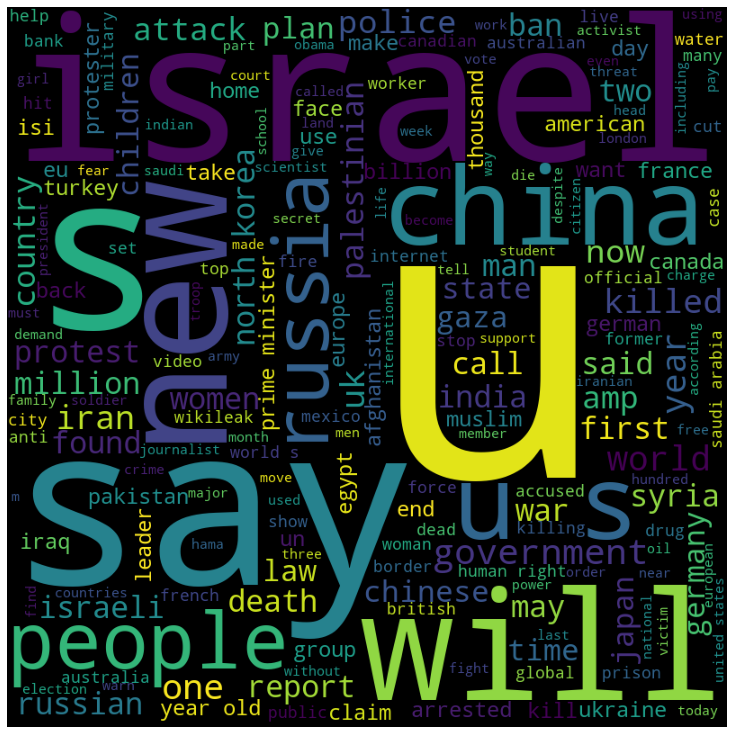

In [54]:
import nltk
nltk.download('stopwords')
from wordcloud.wordcloud import WordCloud,STOPWORDS
import re
import os
comment_words = '' 
stop_words = set(STOPWORDS)
for i in data_train.News: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
    
final_wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In the wordcloud, the highlighted words are mostly the names of countries, or words which relates to country level affairs like war, protest. 

---

### 7). EDA

In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1989 non-null   datetime64[ns]
 1   Open          1989 non-null   float64       
 2   High          1989 non-null   float64       
 3   Low           1989 non-null   float64       
 4   Close         1989 non-null   float64       
 5   Volume        1989 non-null   int64         
 6   Log_Volume    1989 non-null   float64       
 7   Label         1989 non-null   int64         
 8   News          1989 non-null   object        
 9   polarity      1989 non-null   float64       
 10  subjectivity  1989 non-null   float64       
 11  compound      1989 non-null   float64       
 12  neutral       1989 non-null   float64       
 13  positive      1989 non-null   float64       
 14  negative      1989 non-null   float64       
 15  sentiment     1989 non-null   object  

We have 2 object type columns. News & sentiment

In [56]:
data_train.describe()

,Open,High,Low,Close,Volume,Log_Volume,Label,polarity,subjectivity,compound,neutral,positive,negative
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,18.778377,0.535445,0.025013,0.362042,-0.961085,0.766676,0.067686,0.165646
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,0.492643,0.498867,0.052575,0.059774,0.183695,0.041750,0.021129,0.038710
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,15.944932,0.000000,-0.196070,0.161332,-0.999500,0.582000,0.007000,0.061000
25%,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,18.420681,0.000000,-0.007821,0.322802,-0.996500,0.740000,0.053000,0.138000
50%,13022.049810,13088.110350,12953.129880,13025.580080,1.351700e+08,18.722044,1.000000,0.027543,0.362117,-0.993500,0.768000,0.066000,0.162000
75%,16477.699220,16550.070310,16392.769530,16478.410160,1.926000e+08,19.076126,1.000000,0.058928,0.400341,-0.986000,0.796000,0.081000,0.190000
max,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08,20.330105,1.000000,0.192702,0.608333,0.992500,0.891000,0.153000,0.312000


Label column is the target column.

#### UNIVARIATE ANALYSIS

In [57]:
data_train['price change']=data_train['Close']-data_train['Open']

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

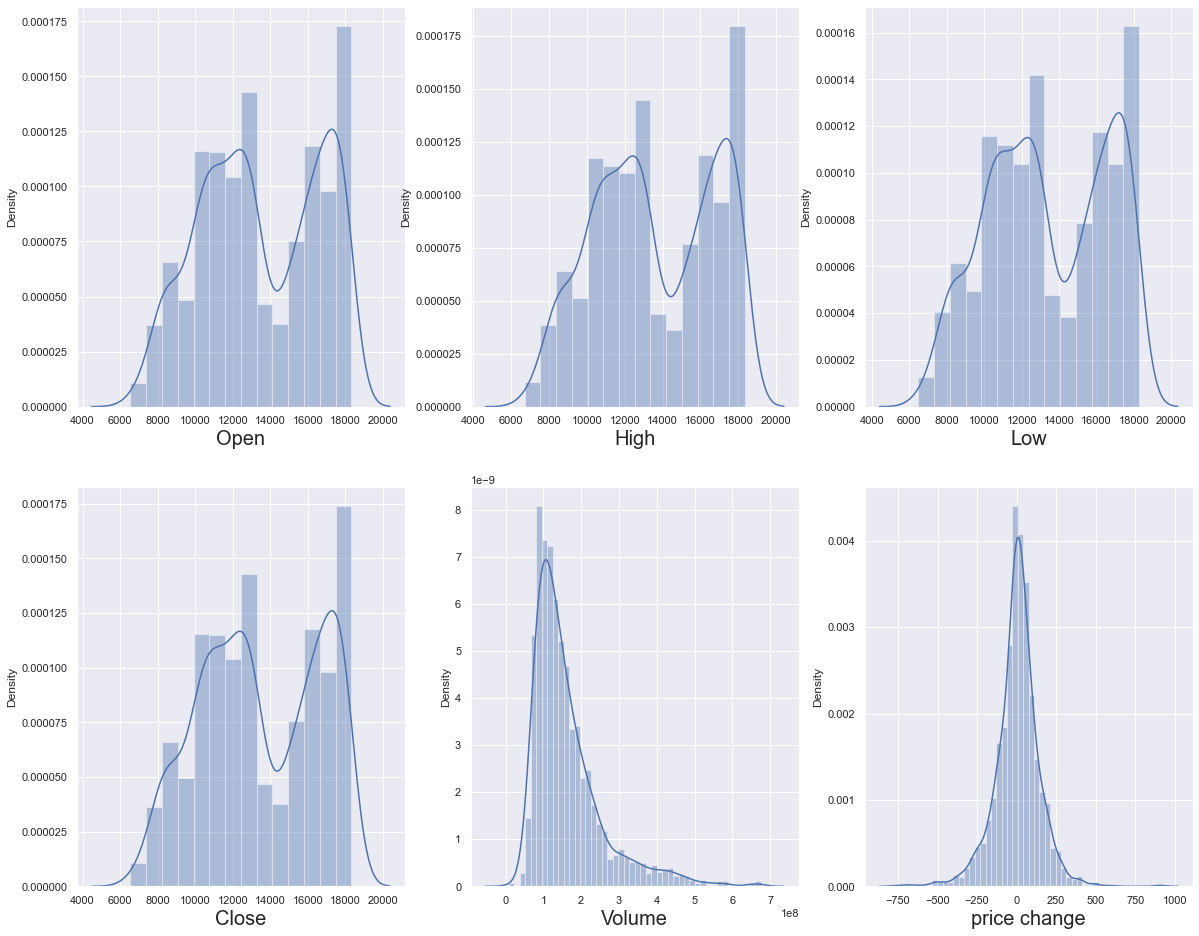

In [58]:
#plots to see distributions of columns in data
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

data_train.set_index('Date',drop=True, inplace=True)
plt.figure(figsize=(20,25))
plotnumber = 1

cols=['Open','High','Low','Close','Volume','price change']
for column in data_train[cols]:
    if plotnumber<=6:   # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

All the numercial values have fine distributions. The graphs of Open, close, high and low seems weirdly similar.

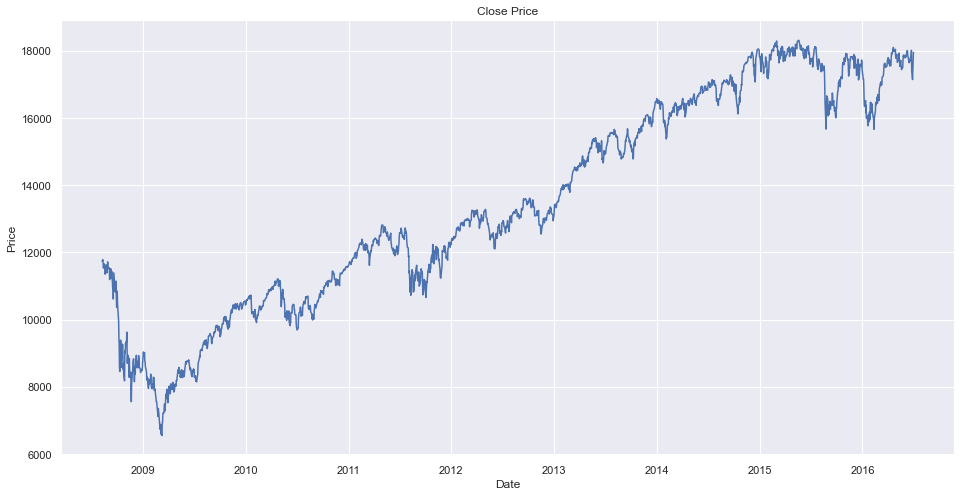

In [59]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price')
plt.show()

We can see that 2009 year has least closing prices and 2015-2016 has highest. The price is continuosly increasing over the years with little dips in between. The price was down for sometime in 2011 ending.

<AxesSubplot:xlabel='Date'>

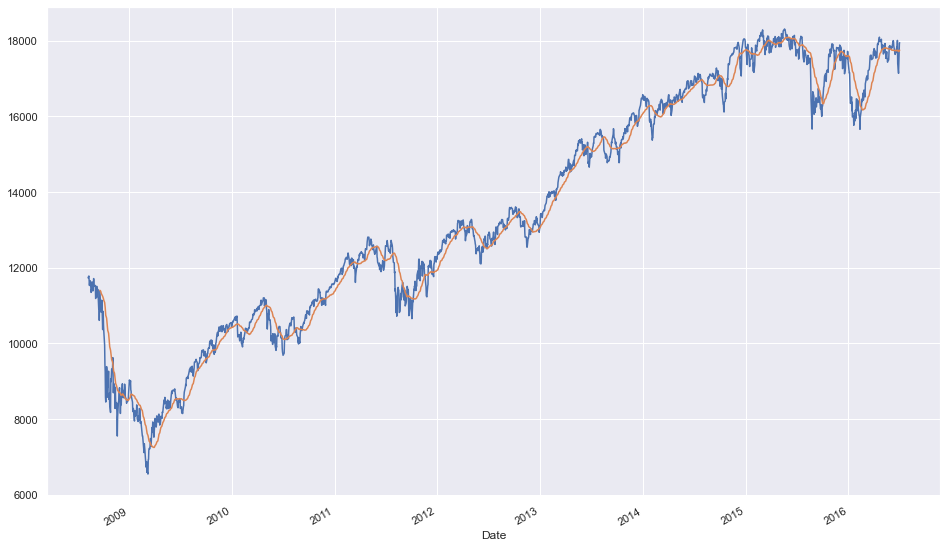

In [60]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
data_train['Close'].plot()
data_train.rolling(window=30).mean()['Close'].plot()

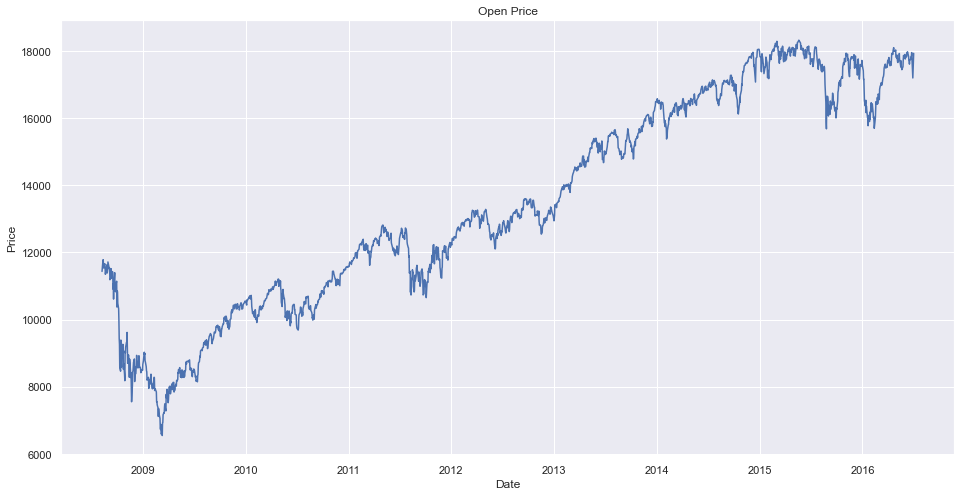

In [61]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open Price')
plt.show()

We can see that 2009 year has least closing prices and 2015-2016 has highest. The price is continuosly increasly over the years with little dips in between. The price was down for sometime in 2011 ending.

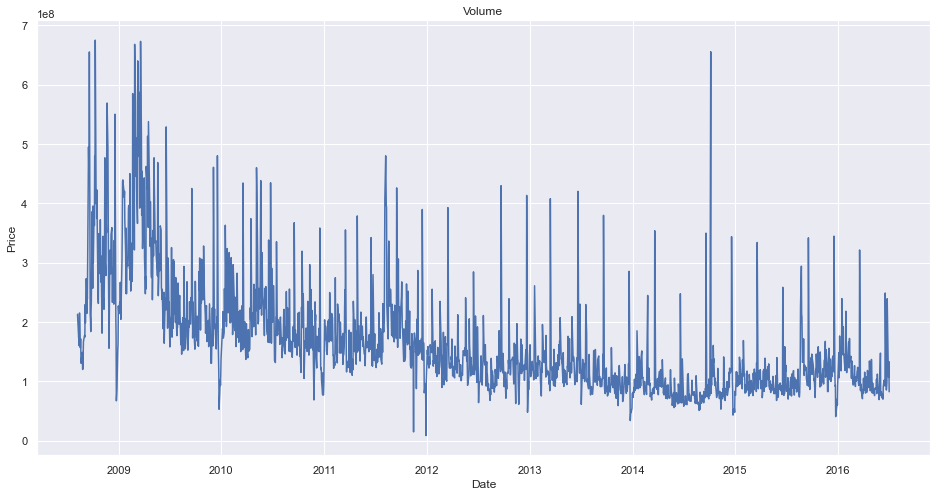

In [62]:
#plotting line graph for close column
plt.figure(figsize=(16,8))
plt.plot(data_train['Volume'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Volume')
plt.show()

Volume keeps fluctuating but its mean is decreasing constantly and slowly over the years with a massive dip in 2011 ending and the beginning of 2012. 

***This dip might be the reason for lower open and close prices in 2011 ending.***

In [63]:
#finding which day has highest opening price
data_train['Open'].idxmax()

Timestamp('2015-05-20 00:00:00')

7th July of 2014 has highest Opening price

In [64]:
#finding which day has highest closing price
data_train['Close'].idxmax()

Timestamp('2015-05-19 00:00:00')

We can see that 3rd July 2014 has highest closing. And a few days after it highest open had occured.


In [65]:
#finding which day has least opening price
data_train['Open'].idxmin()

Timestamp('2009-03-10 00:00:00')

In [66]:
#finding which day has least closing price
data_train['Close'].idxmin()

Timestamp('2009-03-09 00:00:00')

The same can be see here too that as the market closing price was least on 9th March 2009 its opening was least the later day on 10th March

In [67]:
#which day had highest no.of tradings
data_train['Volume'].idxmax()

Timestamp('2008-10-10 00:00:00')

In [68]:
#which day had least no.of tradings
data_train['Volume'].idxmin()

Timestamp('2011-12-29 00:00:00')

Most no.of shares are traded on 10th october 2008 and least no.of shares are traded on 29th december 2011.

#### BIVARIATE ANALYSIS

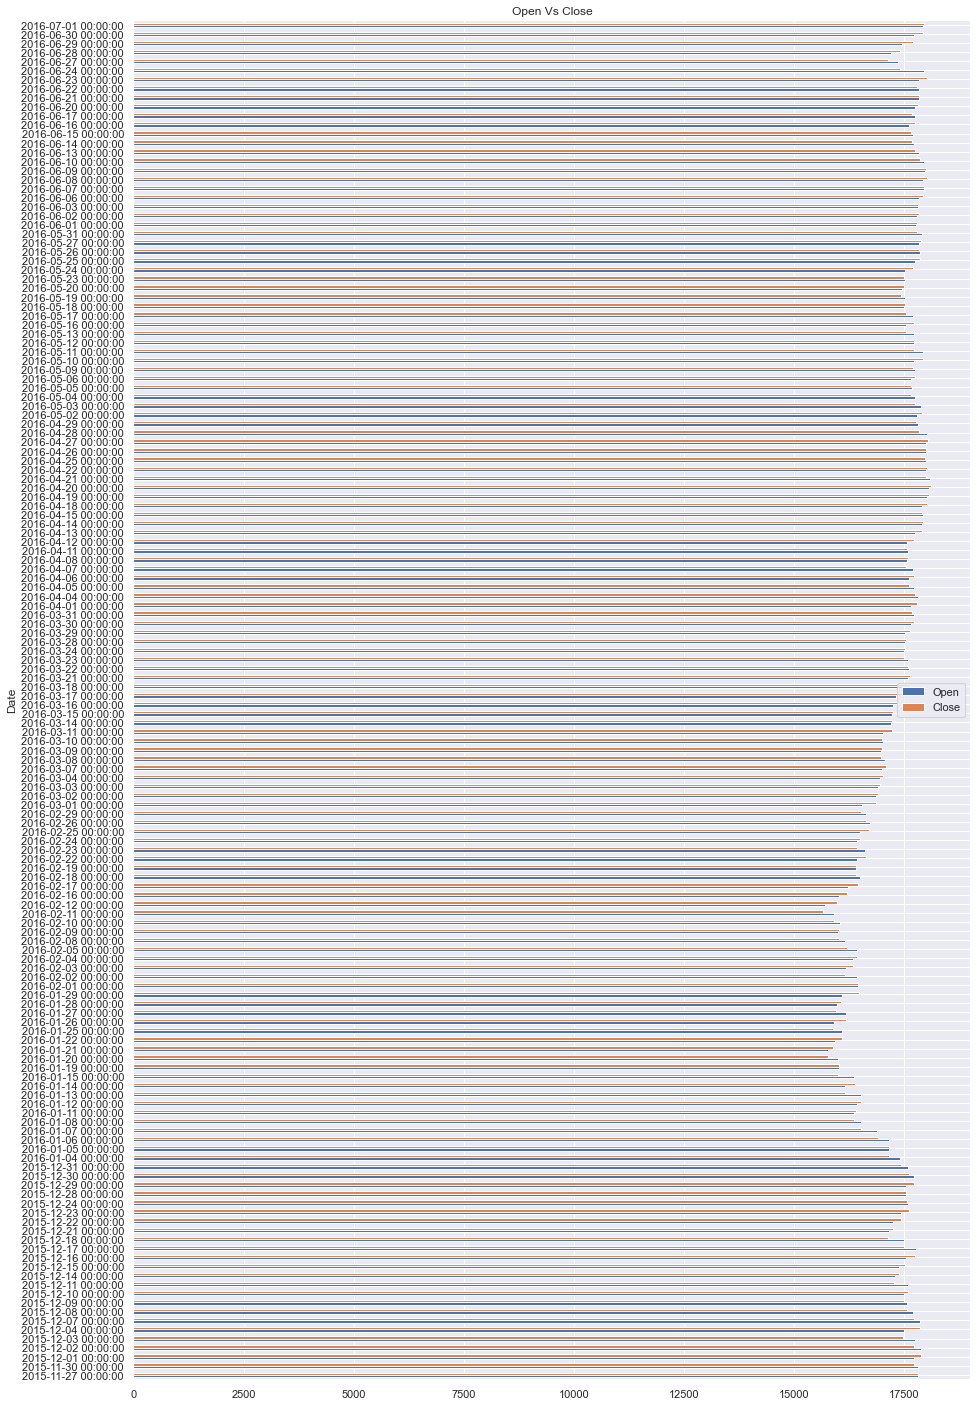

In [69]:
#plotting open vs close prices for the year 2016 
ax=data_train[['Open','Close']].tail(150).plot(kind='barh',figsize=(15,25),title="Open Vs Close",ylabel="Price")

plt.show()

Above are the opening and closing prices for the year 2014

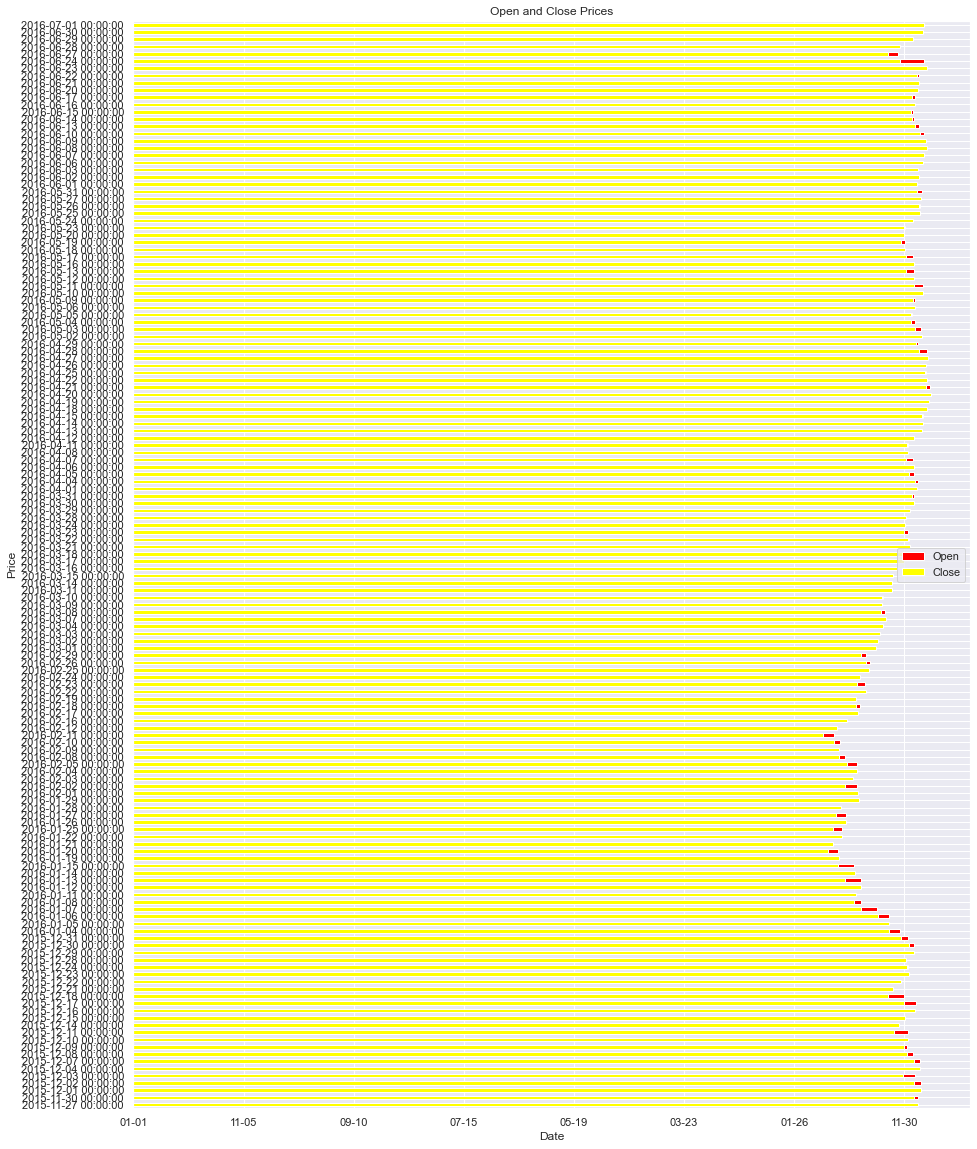

In [70]:
#plotting same opening and closing prices of year 2016 but in the same bar column on on top of other.In this way we can easily find wchih of the two is greater for a particular day
ax=data_train[['Open']].tail(150).plot(kind='barh',color="red",figsize=(15,25))
data_train[['Close']].tail(150).plot(kind='barh',ax=ax, color="yellow",figsize=(15,20))
ax.set(xlabel="Date",
       ylabel="Price",
       title="Open and Close Prices")
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.show()

This graph also represents opening and closing prices for year 2014 but we can clearly see here that most of the days have closing prices greater than opening prices . We can observe that the ending plots in hte graph have mostly opening priices greater than closing prices implying the market probably suffered losses.

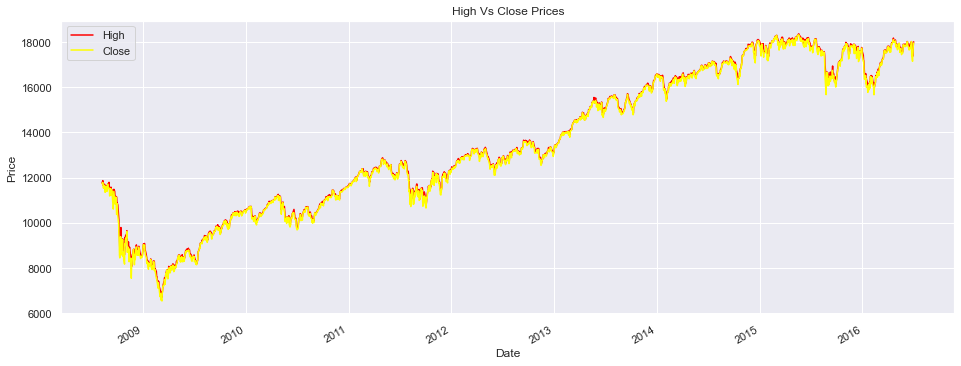

In [71]:
#plotting high and closing prices
ax=data_train[['High']].plot(kind='line',color="red",figsize=(16,6))
data_train[['Close']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6))
ax.set(xlabel="Date", ylabel="Price", title="High Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Above graph shows High Price Vs Closing Price. We can see very few days the market has same closing price ans high price

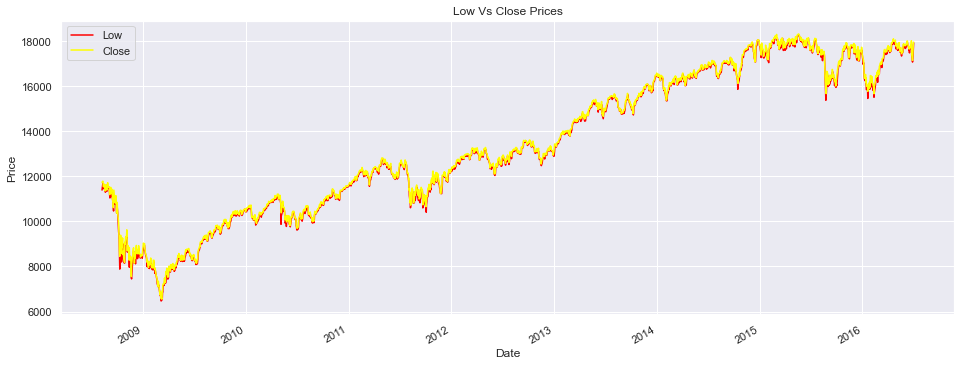

In [72]:
#plotting low and closing prices
ax=data_train[['Low']].plot(kind='line',color="red",figsize=(16,6))
data_train[['Close']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6))
ax.set(xlabel="Date",
       ylabel="Price",
       title="Low Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Above graph shows low Price Vs Closing Price.We can see that every day the market has a closing price equal to or more that the lowest price that day

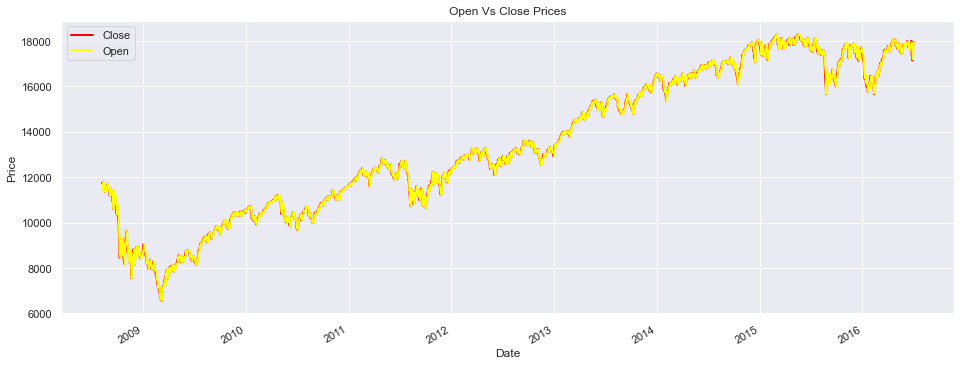

In [73]:
#plotting open and closing prices
ax=data_train[['Close']].plot(kind='line',color="red",figsize=(16,30),linewidth=2)
data_train[['Open']].plot(kind='line',ax=ax, color="yellow",figsize=(16,6),linewidth=2)
ax.set(xlabel="Date",ylabel="Price",title="Open Vs Close Prices")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

Above graph shows Open Price Vs Closing Price.We can see that both of them have similar pattern

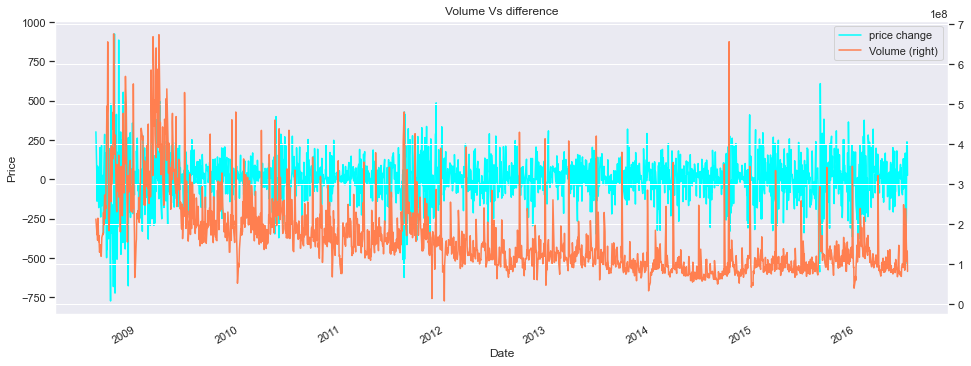

In [74]:
#seeing if volume of shares traded and difference between opening and closing prices has any correlation
fig, ax = plt.subplots()
data_train[['price change']].plot(ax=ax,kind="line", color="cyan",figsize=(16,6))
data_train[['Volume']].plot(ax=ax, color="coral",secondary_y = True,figsize=(16,6))
ax.set(xlabel="Date",ylabel="Price",title="Volume Vs difference")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [75]:
#finding pearson correlation between volume and difference
from scipy.stats import pearsonr
list1 = data_train['price change']
list2 = data_train['Volume']
  
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.063


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Volume Vs Closing Price')]

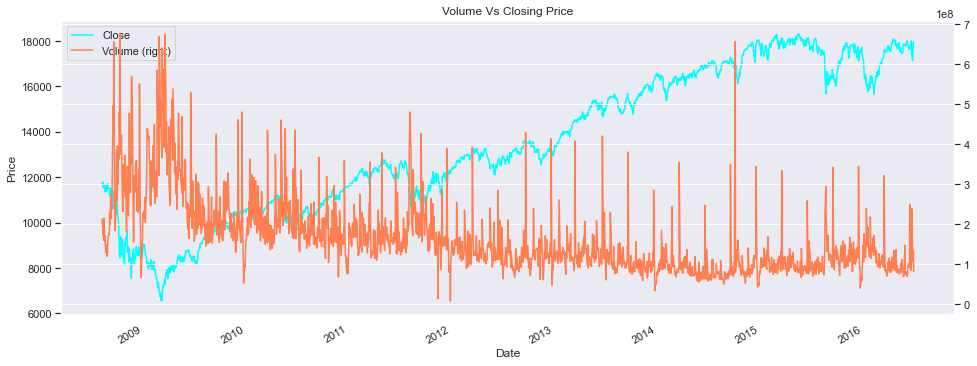

In [76]:
#plotting closing prices and volume
fig, ax = plt.subplots()
data_train[['Close']].plot(ax=ax, color="cyan",figsize=(16,6))
data_train[['Volume']].plot(ax=ax, color="coral",secondary_y = True,figsize=(16,6))
ax.set(xlabel="Date",ylabel="Price", title="Volume Vs Closing Price")

We see that as the years pass the closing price is increasing but the volume has decreased.

In [77]:
#pearson corelation between volumes and closing prices
list1 = data_train['Close']
list2 = data_train['Volume']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.694


We see that Volumes of shares traded and closing price are negatively correlated


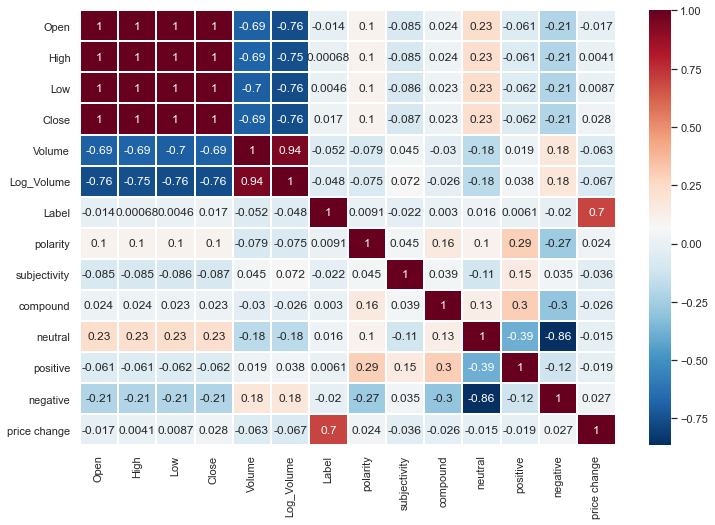

In [78]:
#finding pearson correlation between each pair of variables and plotting them
corr = data_train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12,8))  
corr_visual = sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.2,ax=ax)

The price change feature has high correlation with Label. Open, High , Low, and Close are highly correlated with a correlation of 1.

In [79]:
#finding day on which we have maximun difference between opening  and closing prices. This means we have highest profit in market
print("Date : ",data_train['price change'].idxmax())
print("Difference in Opening and closing price:",data_train['price change'].max())

Date :  2008-10-13 00:00:00
Difference in Opening and closing price: 925.1904300000006


In [80]:
#news on the day which had highest profit
data_train.loc['10/13/2008','News']

' eu bans the incandescent light bulb   afp  paul krugman wins nobel economics prize   europe to u s   you messed up the rescue  too   hindu threat to christians  convert or flee   europe puts      trillion on line for banks  almost   times the usa bailout   congratulations on your nobel prize in economics paul krugman    when can we get some damn privacy  governments lose data  up to    m people s data missing   africa  sexually transmitted grades kills quality education   new beijing traffic laws take         cars off the road in china   a jamaican lottery scam draws in millions of us dollars every day  providing jamaican gangs with high calibre weapons    terror bill     day detention rejected   ringo  too busy  for autographs   eu warns youth  turn your mp  players down    for three decades the free aceh movement fought for independence from indonesia  settling finally for autonomy   now its founder  long in exile  comes home     north korea restores u n  monitoring of atom site di

we see that the market had huge a profit on 13th october 2008 (largest differnce between openinig and closing prices)
The news that "Europe puts $2.3 trillion on line for banks,..." might have been the major reason for this raise in market

In [81]:
#finding day on which we have minimum difference between opening  and closing prices. This means we have highest loss in market
print("Date : ",data_train['price change'].idxmin())
print("Difference in Opening and closing price:",data_train['price change'].min())

Date :  2008-09-29 00:00:00
Difference in Opening and closing price: -774.1699200000003


In [82]:
#news on the day which had highest loss
data_train.loc['9/29/2008','News']

' the power of nightmares   bbc  part      japan makes cars  saudi arabia pumps oil  china supplies socks and flat screen tvs  what s america s no   export  debt   chinese officials called it a separatist attack  new photos show chinese officers attacking other chinese officers   with machetes   huge european bank and iinsurance giant fails    bailout of      billion euro        billion  by   separate gov ts       year old woman murdered after being accused of witchcraft  belief in witchcraft is not just a harmless quirk    british children as young as nine are being forced into marriage by their families   nucking futs    israeli settlers threaten to kill british film crew  curse jesus  video of an israeli settler threatening a british film crew     sniper shoots dead a prisoner inside french jail before he could be quizzed by police over a murder   al qaeda    the database   extreme right emerges as strong force in austria    the taliban have been engaged in secret talks about ending

The market had a huge loss on 29th september 2008. ANd the above are the top 25 news on that particular day.the news that "Huge European bank and iinsurance giant fail" might be a reason for this loss .the hurricane in Canada might be a minor reason too
We need to note a common point that there was a huge gain and loss when a news about banks in Europe are published 

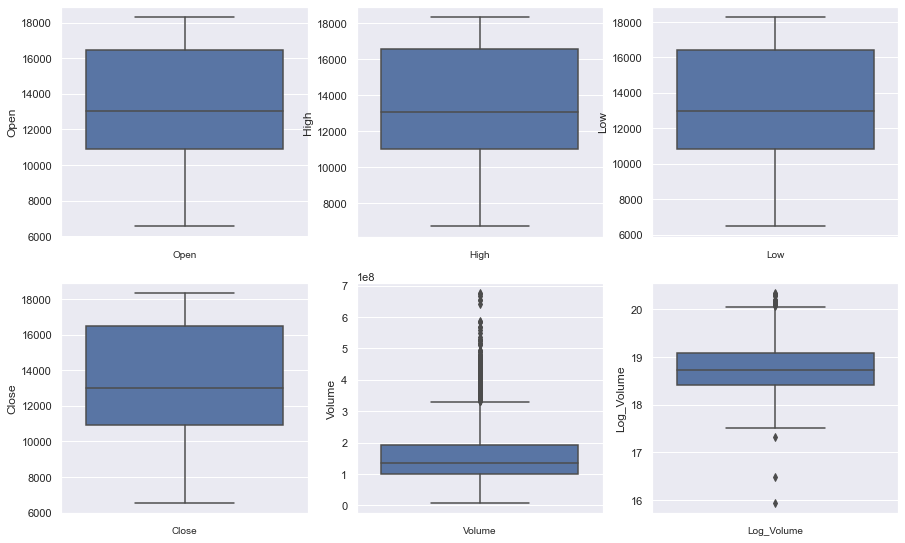

In [83]:
#boxplots for all the variables
plt.figure(figsize=(15,50))
graph = 1

for column in data_train.columns[:6]:
    if graph<=30:    
        ax = plt.subplot(10,3,graph)
        sns.boxplot(y=data_train[column],orient='v')
        plt.xlabel(column,fontsize=10)      
    graph+=1
plt.show()

There are outliers in volume column, even after using log transformation to the column.

In [84]:
c=outlier_indices(data_train['Log_Volume']) #using the customised function outlier_indices
print("indexes at which outliers are present",c)

number of outliers in the data: 21
indexes at which outliers are present [29, 44, 73, 74, 93, 134, 139, 140, 146, 147, 150, 152, 153, 154, 155, 173, 217, 825, 855, 1354, 1550]


The user input includes Open , Close, and News column only. So, the volume column is not required in the training data set.


---
**Training data will be feed to predict whether the price will go up(1) or down(0).**
* The input features will only be open, close and news. So we will keep only these columns and the columns which we have derived.

In [85]:
#dropping extra columns
data_train.drop(['High','Low','Volume','Log_Volume','price change','sentiment','Label'],axis=1,inplace=True)
data_train.head()

,Open,Close,News,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,,
2008-08-08,11432.08984,11734.32031,georgia downs two russian warplanes as coun...,-0.048568,0.267549,-0.9982,0.727,0.041,0.233
2008-08-11,11729.66992,11782.34961,why wont america and nato help us if they wo...,0.109325,0.374806,-0.9838,0.727,0.088,0.185
2008-08-12,11781.70020,11642.46973,remember that adorable year old who sang at...,-0.035676,0.495171,-0.9679,0.821,0.055,0.124
2008-08-13,11632.80957,11532.95996,u s refuses israel weapons to attack iran ...,0.005842,0.364021,-0.9818,0.786,0.065,0.149
2008-08-14,11532.07031,11615.92969,all the experts admit that we should legalise...,0.049050,0.390095,-0.9846,0.708,0.105,0.188


In [86]:
data_train.to_csv('data.csv')

---

### 8). Conclusion

1.Volume and difference features had many outliers

2.Difference feature created has very less correlation with all other features

3.Opening and Closing prices have similar pattern

4.All the original features other than volume are highly correlated to each other. We can even see this through graph as Open,Close,High,Low have similar patterns 

5.There were extensive losses in the year 2009.

6.Volume feature seems to be different from other features.

---

# Creation and implementation of the models
---

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
import tensorflow as tf
import io
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 2000)

In [88]:
#importing test and train data
data=pd.read_csv('data.csv',index_col=0)

### Train data

In [89]:
data.head(3)

,Open,Close,News,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,,
2008-08-08,11432.08984,11734.32031,georgia downs two russian warplanes as coun...,-0.048568,0.267549,-0.9982,0.727,0.041,0.233
2008-08-11,11729.66992,11782.34961,why wont america and nato help us if they wo...,0.109325,0.374806,-0.9838,0.727,0.088,0.185
2008-08-12,11781.70020,11642.46973,remember that adorable year old who sang at...,-0.035676,0.495171,-0.9679,0.821,0.055,0.124


---
**Training data will be used to predict whether the price will go up(1) or down(0).**
* Our target column is price indicator
* We won't need the News column as we have already included sentiments from it in our data.


In [90]:
#dropping news column
data=data.drop(['News'],axis=1)
data.head()

,Open,Close,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,
2008-08-08,11432.08984,11734.32031,-0.048568,0.267549,-0.9982,0.727,0.041,0.233
2008-08-11,11729.66992,11782.34961,0.109325,0.374806,-0.9838,0.727,0.088,0.185
2008-08-12,11781.70020,11642.46973,-0.035676,0.495171,-0.9679,0.821,0.055,0.124
2008-08-13,11632.80957,11532.95996,0.005842,0.364021,-0.9818,0.786,0.065,0.149
2008-08-14,11532.07031,11615.92969,0.049050,0.390095,-0.9846,0.708,0.105,0.188


In [91]:
#prepare data for training
X_train_cols=['Open','Close','polarity','subjectivity','compound','neutral','positive','negative']

from sklearn.preprocessing import MinMaxScaler
#scaling training data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data[X_train_cols])
scaled_data

array([[0.41511378, 0.4408942 , 0.37940404, ..., 0.46925566, 0.23287671,
        0.68525896],
       [0.4404009 , 0.44497647, 0.78553694, ..., 0.46925566, 0.55479452,
        0.4940239 ],
       [0.44482222, 0.43308732, 0.41256657, ..., 0.77346278, 0.32876712,
        0.25099602],
       ...,
       [0.92700227, 0.9474974 , 0.70385333, ..., 0.27831715, 0.59589041,
        0.70517928],
       [0.94881899, 0.96749772, 0.53424881, ..., 0.48543689, 0.36986301,
        0.58167331],
       [0.96678972, 0.96914484, 0.46237451, ..., 0.46925566, 0.39726027,
        0.58565737]])

#### Close price data for past 60 days for LSTM

In [92]:
##Create the training dataset
import math

dataset = data.values
train_size= math.ceil(len(dataset)*.8)#training data no. of rows

train_data=scaled_data[:train_size,:]

X_train=[]
y_train=[]

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0:])
    y_train.append(train_data[i,0:])

In [93]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [94]:
X_train.shape, y_train.shape

((1532, 60, 8), (1532, 8))

---

---
## Model 1: LSTM 

In [95]:
# making X_train a tensor
#X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],8))
#y_train=np.array(y_train).reshape(-1,1,8)

In [96]:
X_train.shape, y_train.shape

((1532, 60, 8), (1532, 8))

In [97]:
#importing libraries for LSTM model
#pip install -U numpy==1.18.5

from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report

model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 8)))
model1.add(LSTM(50,return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(8))

In [98]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
model1.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

epochs=10
batch_size=1

history=model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
          #,validation_split=0.2)#, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
1532/1532 [==============================] - 81s 53ms/step - loss: 0.0161 - accuracy: 0.3466
Epoch 2/10
1532/1532 [==============================] - 62s 40ms/step - loss: 0.0141 - accuracy: 0.3910
Epoch 3/10
1532/1532 [==============================] - 325s 212ms/step - loss: 0.0139 - accuracy: 0.3858
Epoch 4/10
1532/1532 [==============================] - 34s 22ms/step - loss: 0.0138 - accuracy: 0.3760
Epoch 5/10
1532/1532 [==============================] - 44s 29ms/step - loss: 0.0136 - accuracy: 0.3766
Epoch 6/10
1532/1532 [==============================] - 62s 41ms/step - loss: 0.0136 - accuracy: 0.3858
Epoch 7/10
1532/1532 [==============================] - 63s 41ms/step - loss: 0.0135 - accuracy: 0.3864
Epoch 8/10
1532/1532 [==============================] - 57s 37ms/step - loss: 0.0135 - accuracy: 0.3760
Epoch 9/10
1532/1532 [==============================] - 64s 42ms/step - loss: 0.0134 - accuracy: 0.3995
Epoch 10/10
1532/1532 [==============================] - 63s 4

### Testing data

In [99]:
#Create the testing dataset
test_data=scaled_data[train_size-60: ,:]

#Create datasets --> x_test and y_test
X_test=[]
y_test=scaled_data[train_size: ,:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0:])

In [100]:
X_test, y_test= np.array(X_test), np.array(y_test)
#reshaping X_tet and y_test
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],8))
#y_test=np.array(y_test).reshape(-1,1,8)

#Evaluating model
accr=model1.evaluate(X_test,y_test)
print(accr)

13/13 [==============================] - 0s 13ms/step - loss: 0.0132 - accuracy: 0.5164
[0.01321286428719759, 0.516372799873352]


The model is only 51.6% accurate.

---

In [101]:
predicted_y_test = model1.predict(X_test)
predicted_y_test[0]

array([0.9527897 , 0.9567349 , 0.5392283 , 0.42095935, 0.04641471,
       0.6493437 , 0.3795888 , 0.33595428], dtype=float32)

In [102]:
predictions = scaler.inverse_transform(predicted_y_test) #unscaling the values

In [104]:
train = data[:train_size]
train

,Open,Close,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,
2008-08-08,11432.08984,11734.32031,-0.048568,0.267549,-0.9982,0.727,0.041,0.233
2008-08-11,11729.66992,11782.34961,0.109325,0.374806,-0.9838,0.727,0.088,0.185
2008-08-12,11781.70020,11642.46973,-0.035676,0.495171,-0.9679,0.821,0.055,0.124
2008-08-13,11632.80957,11532.95996,0.005842,0.364021,-0.9818,0.786,0.065,0.149
2008-08-14,11532.07031,11615.92969,0.049050,0.390095,-0.9846,0.708,0.105,0.188
...,...,...,...,...,...,...,...,...
2014-11-26,17812.25000,17827.75000,0.053437,0.386875,-0.9902,0.753,0.082,0.165
2014-11-28,17830.55078,17828.24023,0.050505,0.338792,-0.9956,0.751,0.069,0.180
2014-12-01,17827.26953,17776.80078,0.052576,0.409697,-0.9949,0.760,0.061,0.179


In [105]:
test = data[train_size:]
test

,Open,Close,polarity,subjectivity,compound,neutral,positive,negative
Date,,,,,,,,
2014-12-04,17910.01953,17900.09961,-0.075678,0.430321,-0.9980,0.797,0.028,0.175
2014-12-05,17903.05078,17958.78906,-0.021534,0.274356,-0.9953,0.736,0.077,0.186
2014-12-08,17954.93945,17852.48047,0.009851,0.307413,-0.9947,0.761,0.072,0.167
2014-12-09,17847.36914,17801.19922,-0.028989,0.306339,-0.9938,0.757,0.074,0.170
2014-12-10,17797.99023,17533.15039,-0.076879,0.439628,-0.9980,0.711,0.066,0.223
2014-12-11,17534.30078,17596.33984,0.061534,0.365222,-0.9866,0.804,0.064,0.132
2014-12-12,17590.05078,17280.83008,0.044611,0.348093,0.5324,0.704,0.153,0.144
2014-12-15,17285.74023,17180.83984,0.011924,0.389543,-0.9915,0.775,0.075,0.150
2014-12-16,17173.07031,17068.86914,0.027500,0.410714,-0.9979,0.703,0.058,0.239


In [106]:
p_list=[] #prediction list
for i in range(len(predictions)):
    p_list.append(predictions[i][1])
    
p_list[:5]

[17803.361, 17695.9, 17654.158, 17747.83, 17743.46]

In [107]:
t_list=np.array(test['Close']) #test list

In [108]:
rmse=np.sqrt(np.mean(((p_list- t_list )**2)))
rmse

249.88279573821313

In [109]:
test['Predicted Price'] = 0
for i in range(len(test)):
    test['Predicted Price'][i] = p_list[i]

<ipython-input-109-8a69a816a70b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted Price'] = 0
<ipython-input-109-8a69a816a70b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted Price'][i] = p_list[i]
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(co

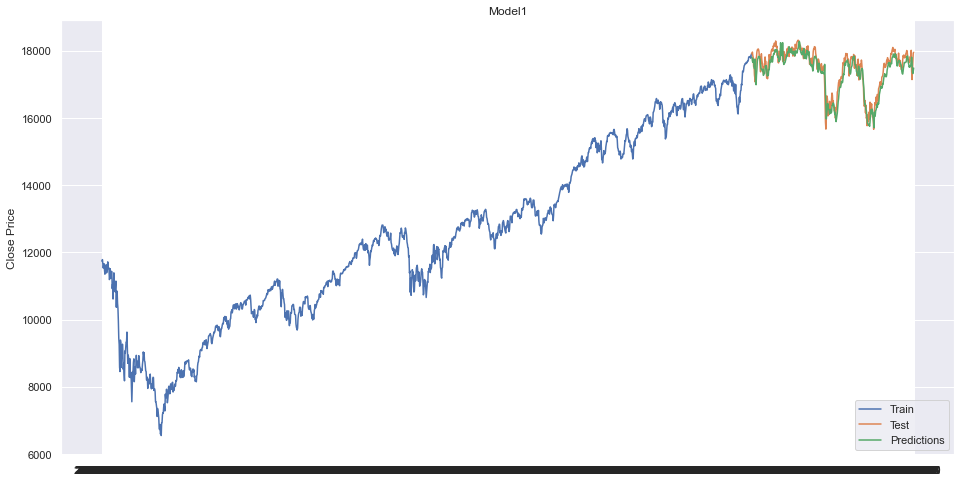

In [110]:
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model1')
plt.ylabel('Close Price')
plt.plot(train[['Close']])
plt.plot(test[['Close','Predicted Price']])
plt.legend(['Train','Test','Predictions'], loc='lower right')
plt.show()

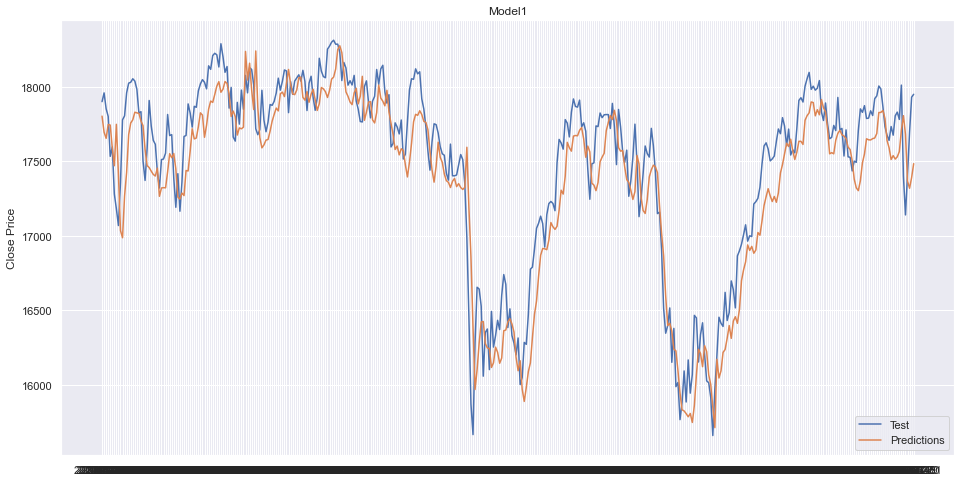

In [111]:
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model1')
plt.ylabel('Close Price')
plt.plot(test[['Close','Predicted Price']])
plt.legend(['Test','Predictions'], loc='lower right')
plt.show()

In [112]:
test[['Close','Predicted Price']]

,Close,Predicted Price
Date,,
2014-12-04,17900.09961,17803
2014-12-05,17958.78906,17695
2014-12-08,17852.48047,17654
2014-12-09,17801.19922,17747
2014-12-10,17533.15039,17743
2014-12-11,17596.33984,17590
2014-12-12,17280.83008,17470
2014-12-15,17180.83984,17748
2014-12-16,17068.86914,17411


In [113]:
test['Predicted Price Indicator'] = 0
for i in range(len(test)):
    if (test['Close'][i] > test['Predicted Price'][i]):
        test['Predicted Price Indicator'][i] = 0 #price down
    else:
        test['Predicted Price Indicator'][i] = 1 #price up

<ipython-input-113-ffbe03f6dce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted Price Indicator'] = 0
<ipython-input-113-ffbe03f6dce6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted Price Indicator'][i] = 0 #price down
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [114]:
test[['Close','Predicted Price','Predicted Price Indicator']]

,Close,Predicted Price,Predicted Price Indicator
Date,,,
2014-12-04,17900.09961,17803,0
2014-12-05,17958.78906,17695,0
2014-12-08,17852.48047,17654,0
2014-12-09,17801.19922,17747,0
2014-12-10,17533.15039,17743,1
2014-12-11,17596.33984,17590,0
2014-12-12,17280.83008,17470,1
2014-12-15,17180.83984,17748,1
2014-12-16,17068.86914,17411,1


---
## Model 2: ARIMA

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

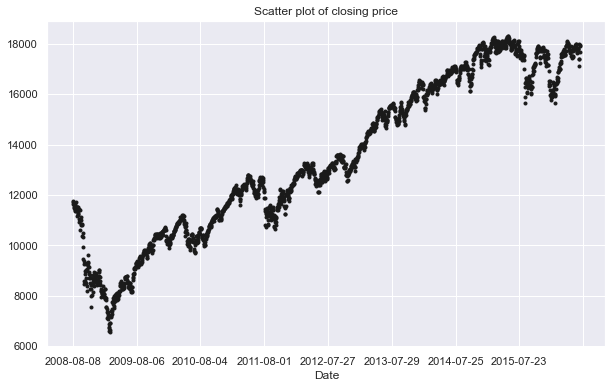

In [116]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

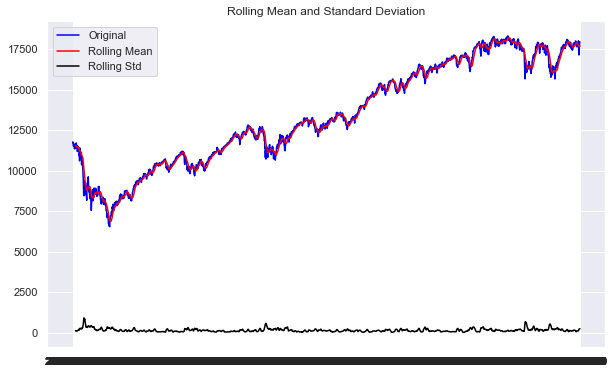

Results of dickey fuller test
Test Statistics                  -0.374713
p-value                           0.914236
No. of lags used                 20.000000
Number of observations used    1968.000000
critical value (1%)              -3.433677
critical value (5%)              -2.863010
critical value (10%)             -2.567552
dtype: float64


In [117]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to **separate seasonality** and trend from our series. The resultant series will become stationary through this process.

<Figure size 1152x648 with 0 Axes>

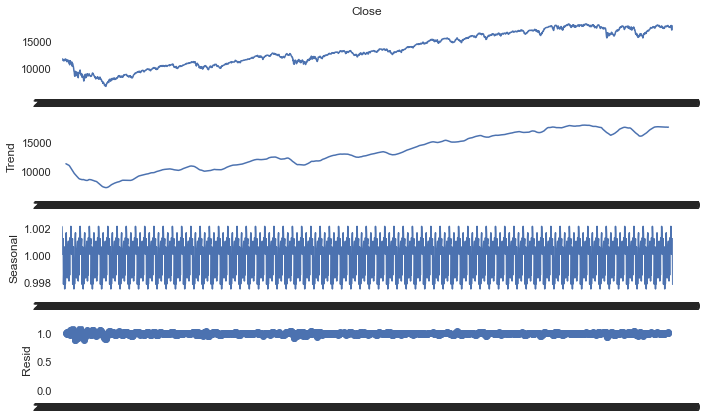

In [118]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure(figsize=(16,9))  
fig = result.plot()  
plt.show()

Reducing the rising trend in the series by taking a log of the series.

No handles with labels found to put in legend.


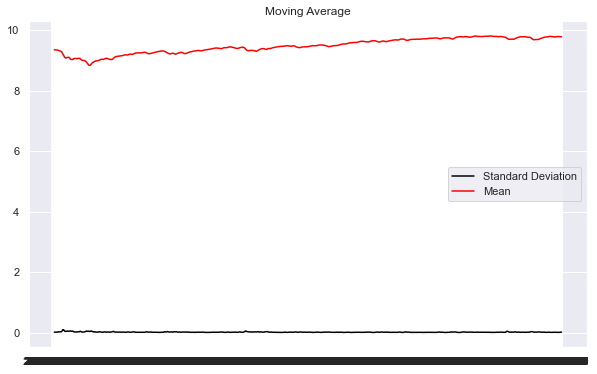

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

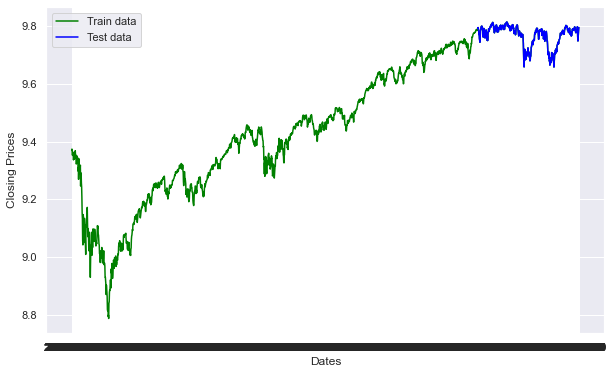

In [120]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

#### Model

In [121]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11628.008, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9222.141, Time=0.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9220.867, Time=1.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9216.033, Time=1.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9227.829, Time=0.59 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2316.058, Time=0.64 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-9222.947, Time=1.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9230.154, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3978.174, Ti

So the Auto ARIMA model provided the value of p,d, and q as 1,0 and 3 respectively. And the model to ne used is SARIMAX.

The best model SARIMAX(1,0,3) has an AIC of 528.6 and the P Values are significant.

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


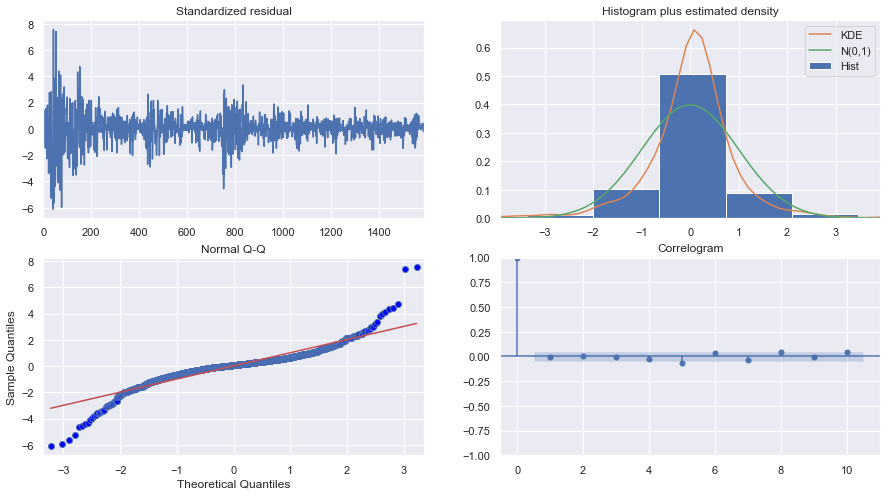

In [122]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model.


In [123]:
model = SARIMAX(train_data, order=(1,0,3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1588
Model:               SARIMAX(1, 0, 3)   Log Likelihood                4616.808
Date:                Fri, 25 Jun 2021   AIC                          -9223.616
Time:                        15:21:25   BIC                          -9196.765
Sample:                             0   HQIC                         -9213.642
                               - 1588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.94e-06   5.15e+05      0.000       1.000       1.000
ma.L1         -0.1355      0.015     -9.164      0.000      -0.164      -0.106
ma.L2         -0.0279      0.012     -2.404      0.0

C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Administrator\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


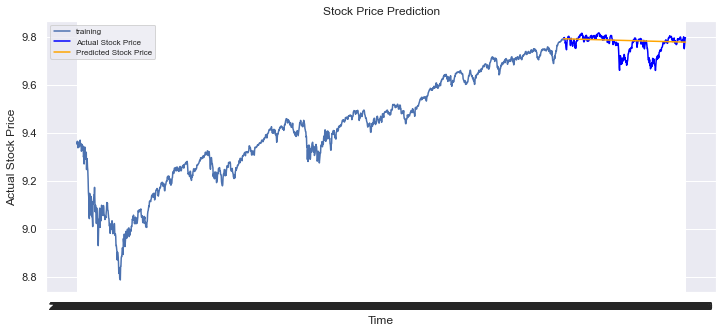

In [124]:
# Forecast
fc= fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
fc_series=pd.DataFrame(fc)
fc_series['Date']=list(test_data.index)
fc_series.set_index('Date', drop=True, inplace=True)

plt.figure(figsize=(12,5))
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [125]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: ',mse)
mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE:  0.001474261472687624
MAE:  0.025327653159186156
RMSE: 0.038396112728863896


---

Of the above models, **LSTM seems to predict better**, derived by observing the graphs. So, saving LSTM model for future use.

### Saving LSTM model

In [126]:
import tensorflow as tf

model1.save('stock_news_prediction.h5')

---